In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

DIR = os.getcwd()
RAW_DATA_DIR = os.path.join(DIR, 'raw')
DATA_PATH = os.path.join(RAW_DATA_DIR, 'ninja_pv_europe_v1.1_merra2.csv')

In [3]:
merra = pd.read_csv(DATA_PATH)
merra.head()

,time,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,MT,NL,NO,PL,PT,RO,RS,SE,SI,SK
0,1985-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1985-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1985-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1985-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1985-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
merra['Datetime (UTC)'] = pd.to_datetime(merra['time'])
merra['Datetime (Local)'] = merra['Datetime (UTC)'] + pd.Timedelta(hours=1)
merra.head()

,time,AL,AT,BA,BE,BG,CH,CY,CZ,DE,...,NO,PL,PT,RO,RS,SE,SI,SK,Datetime (UTC),Datetime (Local)
0,1985-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985-01-01 00:00:00,1985-01-01 01:00:00
1,1985-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985-01-01 01:00:00,1985-01-01 02:00:00
2,1985-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985-01-01 02:00:00,1985-01-01 03:00:00
3,1985-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985-01-01 03:00:00,1985-01-01 04:00:00
4,1985-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1985-01-01 04:00:00,1985-01-01 05:00:00


In [5]:
merra_spain = merra[['Datetime (UTC)', 'Datetime (Local)', 'ES']].copy()
merra_spain.rename(columns={'ES': 'Capacity factor'}, inplace=True)
print(merra_spain.head())

       Datetime (UTC)    Datetime (Local)  Capacity factor
0 1985-01-01 00:00:00 1985-01-01 01:00:00              0.0
1 1985-01-01 01:00:00 1985-01-01 02:00:00              0.0
2 1985-01-01 02:00:00 1985-01-01 03:00:00              0.0
3 1985-01-01 03:00:00 1985-01-01 04:00:00              0.0
4 1985-01-01 04:00:00 1985-01-01 05:00:00              0.0


In [6]:
merra_spain["Hour"] = merra_spain["Datetime (Local)"].dt.hour
merra_spain["Month"] = merra_spain["Datetime (Local)"].dt.month
merra_spain["Year"] = merra_spain["Datetime (Local)"].dt.year
merra_spain["Day"] = merra_spain["Datetime (Local)"].dt.day
merra_spain.head()

,Datetime (UTC),Datetime (Local),Capacity factor,Hour,Month,Year,Day
0,1985-01-01 00:00:00,1985-01-01 01:00:00,0.0,1,1,1985,1
1,1985-01-01 01:00:00,1985-01-01 02:00:00,0.0,2,1,1985,1
2,1985-01-01 02:00:00,1985-01-01 03:00:00,0.0,3,1,1985,1
3,1985-01-01 03:00:00,1985-01-01 04:00:00,0.0,4,1,1985,1
4,1985-01-01 04:00:00,1985-01-01 05:00:00,0.0,5,1,1985,1


In [8]:
merra_spain["Year"].unique()

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int32)

In [16]:
merra_spain_2016 = merra_spain[merra_spain["Year"] == 2016]
merra_spain_2016.reset_index(drop=True, inplace=True)
merra_spain_2016.info()
# Drop leap year
merra_spain_2016 = merra_spain_2016.drop(merra_spain_2016[(merra_spain_2016["Month"] == 2) & (merra_spain_2016["Day"] == 29)].index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Datetime (UTC)    8784 non-null   datetime64[ns]
 1   Datetime (Local)  8784 non-null   datetime64[ns]
 2   Capacity factor   8784 non-null   float64       
 3   Hour              8784 non-null   int32         
 4   Month             8784 non-null   int32         
 5   Year              8784 non-null   int32         
 6   Day               8784 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(4)
memory usage: 343.3 KB


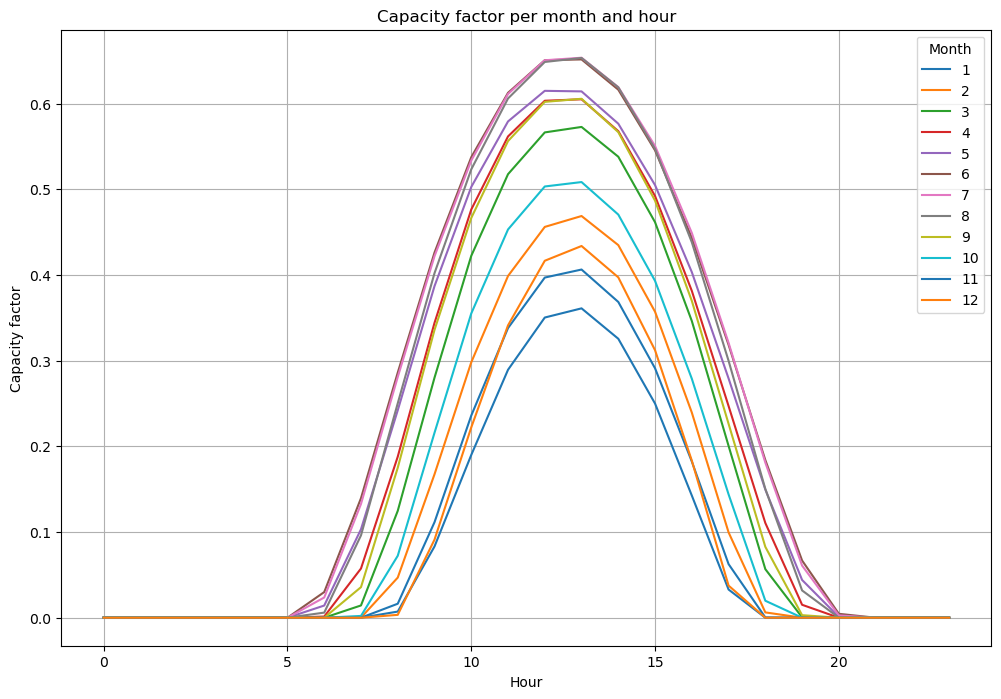

In [19]:
# Group by month and show the average capacity factor per hour

merra_spain_2016_grouped = merra_spain_2016.groupby(["Month", "Hour"]).mean()
merra_spain_2016_grouped.reset_index(inplace=True)
merra_spain_2016_grouped.head()

# Plot the capacity factor per month and hour
fig, ax = plt.subplots(figsize=(12, 8))
for month in merra_spain_2016_grouped["Month"].unique():
    merra_spain_2016_grouped[merra_spain_2016_grouped["Month"] == month].plot(x="Hour", y="Capacity factor", ax=ax, label=month)
    plt.legend(title="Month")
    plt.title("Capacity factor per month and hour")
    plt.xlabel("Hour")
    plt.ylabel("Capacity factor")
    plt.grid(True)
plt.show()


